In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats("svg")

C:\Users\17323\AppData\Local\Temp\ipykernel_14844\2928744843.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats("svg")


In [4]:
file_path = './results-2021-12-18.csv'
df = pd.read_csv(file_path)

## Pre: Functions defined

In [5]:
#多子图
def muti_axes(mode):
    import matplotlib.pyplot as plt
    if mode == 0:
        plt = plt.figure(figsize=(12.8, 4.8), dpi=100) # Resize fig by figsize SODA 9/15
        ax1 = plt.subplots()
        ax1.spines["right"].set_color("none")
        # ax1.spines["left"].set_color("none")  # keep the x and y axes
        ax1.spines["top"].set_color("none")
        # ax1.spines["bottom"].set_color("none")
        return ax1
    # Added mode3 9/25
    if mode == 3:
        plt = plt.figure(figsize=(6.4, 6.4), dpi=100) # Resize fig by figsize SODA 9/15     
        ax2 = plt.subplots()
        ax2.spines["right"].set_color("none")
        # ax1.spines["left"].set_color("none")  # keep the x and y axes
        ax2.spines["top"].set_color("none")
        # ax1.spines["bottom"].set_color("none")
        return ax2
    else:
        # plt = plt.figure(figsize=(12.8, 4.8), dpi=100)
        ax3 = plt.subplot(1,2,mode)
        ax3.spines["right"].set_color("none")
        # ax3.spines["left"].set_color("none")
        ax3.spines["top"].set_color("none")
        # ax3.spines["bottom"].set_color("none")
        return ax3


In [6]:
def xy_egy(algorithm,RQ):
    df1 = df[(df["algorithm"] == algorithm)&(df["RQ"]==RQ)]
    row_labels = df1.index[:]
    if RQ == 2.1:
        col_labels = df1.columns[[0,4,2,8]]
    elif RQ == 2.2:
        col_labels = df1.columns[[0,5,2,8]]
    df2 = df1.loc[row_labels,col_labels]
    df3 = df2.groupby(by="experiment_id").mean()
    x = df3.loc[df3.index[:],df3.columns[0]].to_numpy()
    y = df3.loc[df3.index[:],df3.columns[1]].to_numpy()
    return x,y

def cal_prf(algorithm):
    df1 = df[(df["algorithm"]==algorithm)&(df["no_features"]==8169)&(df["no_datapoints"]==3900)]
    df2 = df1.loc[:,df1.columns[[0,14,15,16]]]
    df3 = df2.groupby(by="algorithm").mean()
    return (df3["precision"].to_numpy(),df3["recall"].to_numpy(),df3["f1"].to_numpy())
    

    


    

In [7]:

from cProfile import label

def plot_bar1(ax,x,y,a_name):
    # if ax == 0 :
    #     fz = 12
    # else:
    #     fz = 9
    ax = muti_axes(ax)
    if a_name == "Random Forest" or a_name == "AdaBoost" :
        ax.set_ylim(0,2.0)
    else:
        ax.set_ylim(0,1.2)
    p1 = ax.bar(x,y,200)
    ax.bar_label(p1, label_type='edge',padding=10)
    #去除了文本框
    # ax.text(x=3700,y=0.9,s="RQ=2.1,\nno_features=8164",fontsize = fz,verticalalignment="top",horizontalalignment="left",color = "b",bbox = dict(facecolor = "gray", alpha = 0.6))
    ax.set_xlabel("no_datapoints")
    ax.set_ylabel("train_energy(J)")
    ax.set_title(a_name)

def plot_bar2(ax,x,y,a_name):
    # if ax == 0 :
    #     fz = 12
    # else:
    #     fz = 9
    ax = muti_axes(ax)
    if a_name == "Random Forest" or a_name == "AdaBoost" :
        ax.set_ylim(0,2.0)
    else:
        ax.set_ylim(0,1.2)
    p1 = ax.bar(x,y,200)
    ax.bar_label(p1, label_type='edge',padding=10)
    # textbox removed
    # ax.text(x=7300,y=0.92,s="RQ=2.2,\nno_datapoints=3900",fontsize = fz,verticalalignment="top",horizontalalignment="left",color = "b",bbox = dict(facecolor = "gray", alpha = 0.6))
    ax.set_xlabel("no_features")
    ax.set_ylabel("train_energy(J)")
    ax.set_title(a_name)

# The drawing function of task3 before, not used for the time being

# def plot_scatter(ax,algorithm):
#     ax = muti_axes(ax)
#     ax.set_xlabel("no_features")
#     ax.set_ylabel("no_datapoints")
#     ax.set_ylim(0,4500)
#     # ,x=2500,y=1500 报错
#     ax.set_title(algorithm,loc="left")
#     x = list(xy_egy(algorithm,2.2)[0])
#     for i in range(9):
#         x.append(8169.0)
#     y = []
#     for i in range(10):
#         y.append(3900.0)
#     y.extend(list(xy_egy(algorithm,2.1)[0][:-1]))
#     xy = list(zip(x,y))  
#     s = list(xy_egy("SVM",2.2)[1])
#     s1 = list(xy_egy("SVM",2.1)[1][:-1])
#     s.extend(s1)
#     data = list(zip(xy,s))
#     x = []
#     for i in data :
#         x.append(i[0][0])
#     y = []
#     for i in data :
#         y.append(i[0][1])
#     s = []
#     for i in data :
#         if ax == 0:
#             s.append(i[1]*1200)
#         else:
#             s.append(i[1]*400)
#     ax.scatter(x=x,y=y,s=s)


def plot_scatter(ax ,x, y):
    ax = muti_axes(ax)
    ax.scatter(x=x,y=y)

def plot_t5scatter(ax):
    ax = muti_axes(ax)
    ax.set_xlabel("recall")
    ax.set_ylabel("f1")
    x = df['recall'].tolist()
    y = df['f1'].tolist()
    ax.scatter(x=x,y=y,s = 5)
    
def plot_barh(ax):
    ax4 = muti_axes(ax)
    algorithms = df["algorithm"].drop_duplicates().tolist()
    alts = []
    y1 = []
    y2 = []
    for i in algorithms:
        xi,yi = xy_egy(i,2.1)
        y1.append(np.average(yi/xi)*np.average(xi))
        alts.append(i)
    for i in algorithms:
        xi,yi = xy_egy(i,2.2)
        y2.append(np.average(yi/xi)*np.average(xi))
    ax4.spines["right"].set_color("none")
    ax4.spines["top"].set_color("none")
    ax4.set_xlabel("Average_train_energy(J)")
    ax4.set_ylabel("Algorithms")
    x1 = [1,2,3,4,5,6]
    x2 = [1.4,2.4,3.4,4.4,5.4,6.4]
    ax4.barh(x1, y1, height=0.4, label='RQ=2.1')
    ax4.barh(x2, y2, height=0.4, label='RQ=2.2')
    ax4.set_yticks([1.2, 2.2, 3.2, 4.2, 5.2, 6.2], alts)
    ax4.legend()
    
def plot_barh1(ax):
    import matplotlib.pyplot as plt 
    ax = muti_axes(0)
    ax.set_xlim(0,1.3)
    ax.set_xlabel("precision,recall,f1")
    ax.set_ylabel("Algorithms")
    alg = df["algorithm"].drop_duplicates().to_list()
    va = []
    precision = []
    recall = []
    f1 = []
    for i in alg :
        precision.append(float(cal_prf(i)[0]))
        recall.append(float(cal_prf(i)[1]))
        f1.append(float(cal_prf(i)[2]))
    ax.set_title("Compare the precision, recall, f1 of different algorithms")
    ax.set_yticks([1.4,2.4,3.4,4.4,5.4,6.4], alg)
    #  
    ax.barh(y=[1.2,2.2,3.2,4.2,5.2,6.2],width=precision, height=0.2,label="precision")
    ax.barh(y=[1.4,2.4,3.4,4.4,5.4,6.4],width=recall, height=0.2,label="recall" )
    ax.barh(y=[1.6,2.6,3.6,4.6,5.6,6.6],width=f1, height=0.2,label="f1")
    ax.legend()




    

## Task 1

#### We first print out the whole dataset.

In [8]:
df

,algorithm,RQ,experiment_id,iteration,no_datapoints,no_features,preprocessing_energy(J),preprocessing_time(s),train_energy(J),train_time(s),predict_energy(J),predict_time(s),datatype,accuracy,precision,recall,f1
0,AdaBoost,2.1,103,2,2730,8169,0.012593,1.638312,1.037993,2.012923,0.043739,1.489494,float64,0.960684,0.893617,0.802548,0.845638
1,Decision Tree,2.2,33,2,3900,2451,0.027051,1.431261,0.068482,1.506254,0.064431,1.478886,float64,0.963517,0.872146,0.852679,0.862302
2,SVM,2.2,15,22,3900,4084,0.018298,1.467225,0.530155,1.941215,0.303603,1.687695,float64,0.828349,0.431965,0.892857,0.582242
3,AdaBoost,2.2,112,1,3900,1633,0.026226,1.454106,0.243067,1.780723,0.093800,1.514068,float64,0.970096,0.910377,0.861607,0.885321
4,Bagging Classifier,2.2,138,6,3900,6535,0.027610,1.476311,0.699298,2.067553,0.056580,1.496940,float64,0.964115,0.910000,0.812500,0.858491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,Random Forest,2.2,96,2,3900,4901,0.025976,1.473068,1.501089,2.928194,0.082175,1.543079,float64,0.978469,0.989583,0.848214,0.913462
3596,Bagging Classifier,2.1,126,20,1559,8169,0.006985,1.440221,0.170978,1.651912,0.037567,1.460747,float64,0.952167,0.926471,0.700000,0.797468
3597,SVM,2.2,17,19,3900,5718,0.090063,1.408732,1.108957,2.026484,0.488150,1.690740,float64,0.828349,0.431965,0.892857,0.582242
3598,Random Forest,2.1,86,18,1559,8169,0.007155,1.437659,0.581876,2.033274,0.046828,1.480216,float64,0.955157,1.000000,0.666667,0.800000


#### Extract the varibles needed.

In [9]:
df1 = df.loc[:,('algorithm','RQ','no_datapoints','no_features','predict_energy(J)')]
df1

,algorithm,RQ,no_datapoints,no_features,predict_energy(J)
0,AdaBoost,2.1,2730,8169,0.043739
1,Decision Tree,2.2,3900,2451,0.064431
2,SVM,2.2,3900,4084,0.303603
3,AdaBoost,2.2,3900,1633,0.093800
4,Bagging Classifier,2.2,3900,6535,0.056580
...,...,...,...,...,...
3595,Random Forest,2.2,3900,4901,0.082175
3596,Bagging Classifier,2.1,1559,8169,0.037567
3597,SVM,2.2,3900,5718,0.488150
3598,Random Forest,2.1,1559,8169,0.046828


#### We will first begin with one algorithm: SVM

In [10]:
dfS = df1[(df["algorithm"] == 'SVM')&(df["RQ"]==2.2)]
row_labels = dfS.index[:]
col_labels = dfS.columns[[3,4]]
dfS.loc[row_labels,col_labels]

,no_features,predict_energy(J)
2,4084,0.303603
10,8169,0.313685
29,6535,0.253381
50,3268,0.193521
63,817,0.109493
...,...,...
3543,8169,0.235127
3565,1633,0.284794
3577,1633,0.207455
3585,5718,0.177845


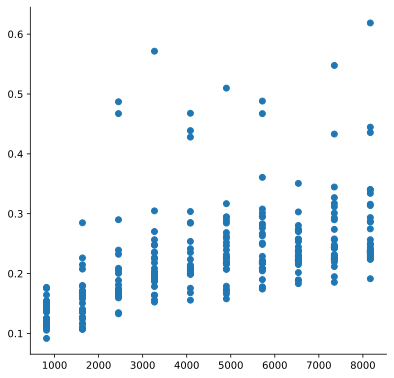

In [11]:
row_labels = dfS.index[:]
col_feature_labels = dfS.columns[3]
col_energy_labels = dfS.columns[4]
x = dfS.loc[row_labels,col_feature_labels].to_numpy()
y = dfS.loc[row_labels,col_energy_labels].to_numpy()

plot_scatter(3,x,y)

### We can see there are only 10 different values tested on one algorithm. So we can use bar charts by showing the average to figure out the trend of the whole dataset.

## Task2

#### Group by experiment_id, because when RQ=2.2, each feature number corresponds to one experiment_id, and each experiment is performed 30 times. The xy_egy() function is grouped by experiment_id, averaged, and then called plot_bar() for visualization.

In [12]:
# function "xy_egy"
# df2 = df1.loc[row_labels,col_labels]
# df3 = df2.groupby(by="experiment_id").mean()

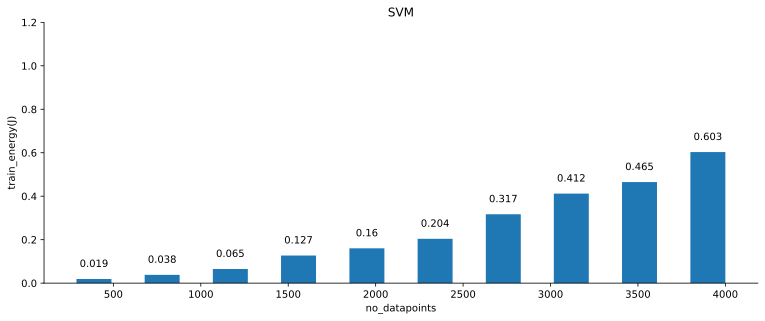

In [13]:

x,y = xy_egy("SVM",2.1)
y = np.around(y,3)
plot_bar1(0,x,y,"SVM")



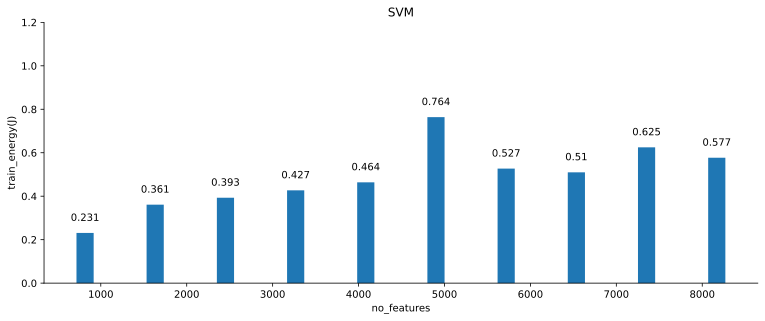

In [14]:
x,y = xy_egy("SVM",2.2)
y = np.around(y,3)
plot_bar2(0,x,y,"SVM")

#no_features 都为8169
#去掉冗余数据


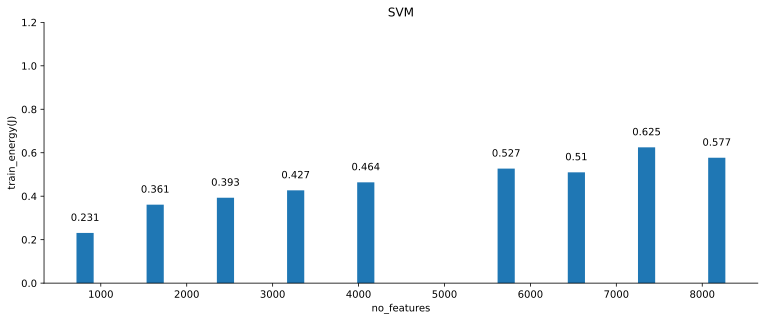

In [23]:
x,y = xy_egy("SVM",2.2)
y = np.around(y,3)
x = np.delete(x,5)
y = np.delete(y,5)
plot_bar2(0,x,y,"SVM")

#no_features 都为8169
#去掉冗余数据


## Task3


#### Let's first see what algorithms are there.

In [16]:
print(len(df["algorithm"].drop_duplicates()))
df["algorithm"].drop_duplicates()

6


0               AdaBoost
1          Decision Tree
2                    SVM
4     Bagging Classifier
6                    KNN
14         Random Forest
Name: algorithm, dtype: object

#### Let the size of each canvas be (1200, 400), for each algorithm, first use xy_egy to determine the number of features or samples of each algorithm and transfer it to x and y, and set the number of decimal places of y to 3 Bit (convenient for illustration) and then call the functions plot_bar1 (for RQ=2.1) and plot_bar2 to draw (for RQ=2.2)。In addition, the drawing function calls the muti_axes function, and when the mode is equal to 1 or 2, it will be in a different subgraph.

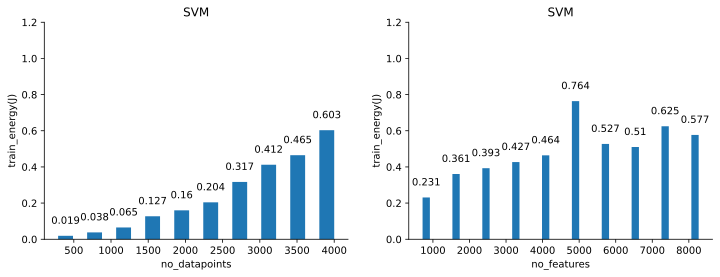

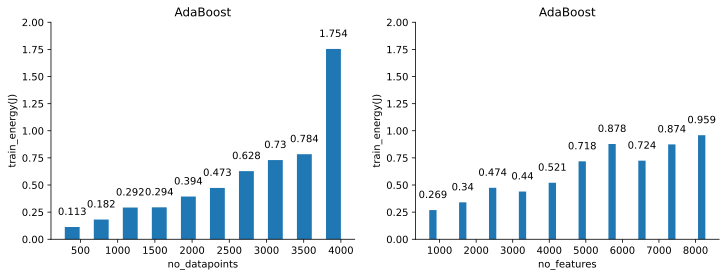

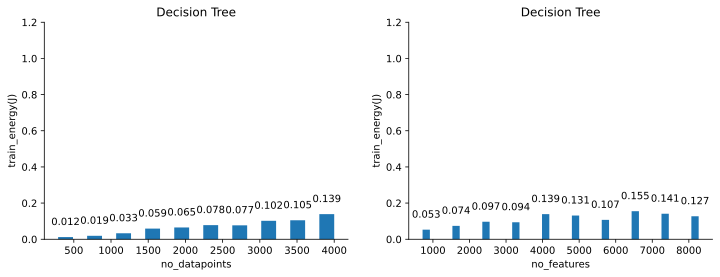

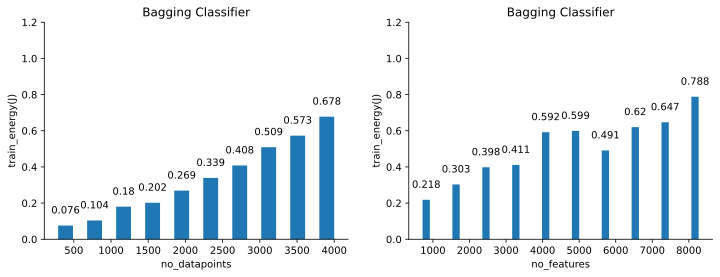

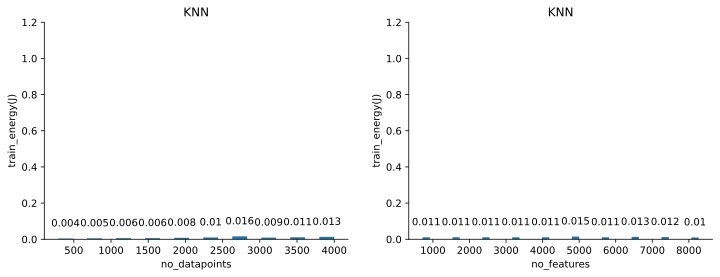

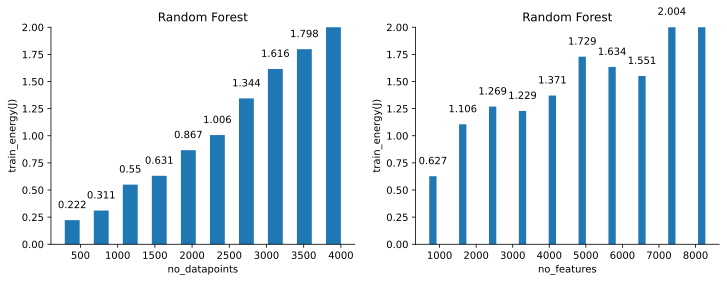

In [17]:
import matplotlib.pyplot as plt
plt = plt.figure(figsize=(12, 4), dpi=100)
x,y = xy_egy("SVM",2.1)
y = np.around(y,3)
plot_bar1(1,x,y,"SVM")
x,y = xy_egy("SVM",2.2)
y = np.around(y,3)
plot_bar2(2,x,y,"SVM")

import matplotlib.pyplot as plt
plt = plt.figure(figsize=(12, 4), dpi=100)
x,y = xy_egy("AdaBoost",2.1)
y = np.around(y,3)
plot_bar1(1,x,y,"AdaBoost")
x,y = xy_egy("AdaBoost",2.2)
y = np.around(y,3)
plot_bar2(2,x,y,"AdaBoost")
#
import matplotlib.pyplot as plt
plt = plt.figure(figsize=(12, 4), dpi=100)
x,y = xy_egy("Decision Tree",2.1)
y = np.around(y,3)
plot_bar1(1,x,y,"Decision Tree")
x,y = xy_egy("Decision Tree",2.2)
y = np.around(y,3)
plot_bar2(2,x,y,"Decision Tree")
#
import matplotlib.pyplot as plt
plt = plt.figure(figsize=(12, 4), dpi=100)
x,y = xy_egy("Bagging Classifier",2.1)
y = np.around(y,3)
plot_bar1(1,x,y,"Bagging Classifier")
x,y = xy_egy("Bagging Classifier",2.2)
y = np.around(y,3)
plot_bar2(2,x,y,"Bagging Classifier")
#
import matplotlib.pyplot as plt
plt = plt.figure(figsize=(12, 4), dpi=100)
x,y = xy_egy("KNN",2.1)
y = np.around(y,3)
plot_bar1(1,x,y,"KNN")
x,y = xy_egy("KNN",2.2)
y = np.around(y,3)
plot_bar2(2,x,y,"KNN")
import matplotlib.pyplot as plt
plt = plt.figure(figsize=(12, 4), dpi=100)
x,y = xy_egy("Random Forest",2.1)
y = np.around(y,3)
plot_bar1(1,x,y,"Random Forest")
x,y = xy_egy("Random Forest",2.2)
y = np.around(y,3)
plot_bar2(2,x,y,"Random Forest")



## Task4

We defined a function named plot_barh(). In plot_barh() We made a division of every no_features values with egy and no_datapoints values with egy. Then we get a average of egy cost rate of every althirom into one horizontal bar chart.

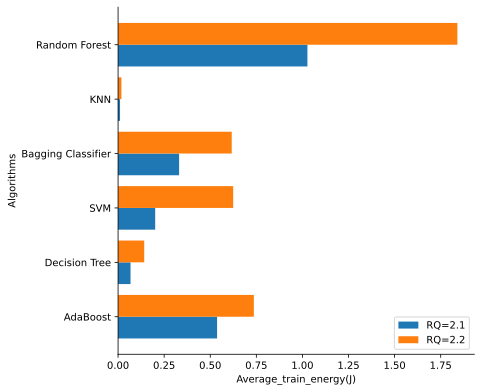

In [18]:
plot_barh(3)

## Task5

We try to use a scatter plot to show the relationship between 'recall' and 'f1'.

In [19]:
df.iloc[:,[-3,-2,-1]]

,precision,recall,f1
0,0.893617,0.802548,0.845638
1,0.872146,0.852679,0.862302
2,0.431965,0.892857,0.582242
3,0.910377,0.861607,0.885321
4,0.910000,0.812500,0.858491
...,...,...,...
3595,0.989583,0.848214,0.913462
3596,0.926471,0.700000,0.797468
3597,0.431965,0.892857,0.582242
3598,1.000000,0.666667,0.800000


By the result of the scatter plot,we can find there would be a positive-relevant relationship between recall and f1.

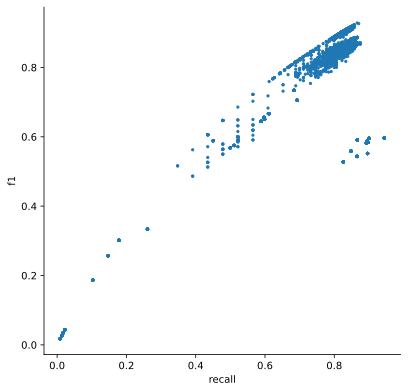

In [20]:
plot_t5scatter(3)